In [1]:
import pandas as pd
import skimage
from skimage.transform import resize
from skimage.io import imread
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
from scipy import ndimage as nd
import numpy as np
import os
import matplotlib.pyplot as plt
import random

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [27]:
Categories=['COVID','Normal']
Input_arr=[]
Target_arr=[]
datadir='C:\ML Algos\COVID-19_Radiography_Dataset'
for i in Categories:
  print(f'Loading...Category:{i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(100,100,3))
    Input_arr.append(img_resized.flatten())
    Target_arr.append(Categories.index(i))
  print(f'Loaded Category: {i} successfully')
input_data=np.array(Input_arr)
target_data=np.array(Target_arr)
df=pd.DataFrame(input_data)
df['Target']=target_data
X=df.iloc[:,:-1] 
y=df.iloc[:,-1]
X = X.to_numpy() 
y = y.to_numpy()


Loading...Category:COVID
Loaded Category: COVID successfully
Loading...Category:Normal
Loaded Category: Normal successfully


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [29]:
X_train.size

331380000

In [30]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [31]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (11046, 100, 100, 3)
Shape of X_test:  (2762, 100, 100, 3)
Shape of y_train:  (11046, 1)
Shape of y_test:  (2762, 1)


In [32]:
X_train[1,:]

array([[[-9.64301250e-04,  1.80538868e-02,  1.74103117e-02],
        [ 4.02058192e-02,  1.56609944e-01,  5.57013605e-03],
        [ 9.28473211e-03,  1.06413594e-01,  1.69766664e-01],
        ...,
        [-2.12046526e-03,  1.50020391e-01,  1.52974047e-01],
        [ 1.55602792e-01,  5.39875555e-03,  4.40621755e-03],
        [ 1.10393097e-01, -1.47808499e-04,  4.40623839e-03]],

       [[ 3.11982510e-02,  1.58823308e-01,  5.57013605e-03],
        [ 3.51349886e-03,  1.69916043e-03,  2.51397921e-01],
        [ 5.66899328e-02,  1.96444360e-02,  1.02425284e-01],
        ...,
        [ 9.71974300e-03,  5.37791084e-03,  5.23753979e-03],
        [ 6.97543877e-02,  2.30489456e-01,  1.21192305e-02],
        [ 6.51411229e-03,  1.88857386e-01,  8.70555806e-02]],

       [[ 2.32659702e-03,  1.11625489e-02,  1.56059008e-03],
        [ 6.80440297e-03,  1.74005375e-01,  3.11618655e-02],
        [ 4.61356166e-02,  6.93689193e-02,  4.47728340e-02],
        ...,
        [ 3.79963755e-03,  5.16382968e-02,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


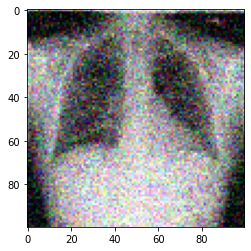

In [33]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LayerNormalization, Dropout
model = Sequential([
    Conv2D(filters = 15, kernel_size = (6,6), activation = 'relu', input_shape = (100, 100, 3), data_format = "channels_last"  ),
    LayerNormalization(axis=3 , center=True , scale=True),
    MaxPooling2D(4,4),
    Dropout(0.2),

    Conv2D(filters = 15, kernel_size = (4,4), activation = 'relu', data_format = "channels_last" ),
    LayerNormalization(axis=3 , center=True , scale=True),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Flatten(),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')            
]) 
model.summary()
#Conv2D(No.OfFilters, Filter_Size, Filter_function, ExpectedImageShape);MaxPooling2D(Filter_Size);Dense(No.OfFullyConnectedNeurons,ActivationFunction)
#2 Layer CNN
#Final dense layer will the same number of neurons as the number of output classes except in binary classification

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 95, 95, 15)        1635      
                                                                 
 layer_normalization (LayerN  (None, 95, 95, 15)       30        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 15)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 15)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 15)        3615      
                                                                 
 layer_normalization_1 (Laye  (None, 20, 20, 15)       3

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, LayerNormalization, Dropout
model = Sequential()

model.add(Conv2D(15, (6,6), activation = 'relu', input_shape = (100, 100, 3), data_format = "channels_last" ))
LayerNormalization(axis=3 , center=True , scale=True),
model.add(MaxPooling2D(4,4))

model.add(Conv2D(15, (4,4), activation = 'relu', data_format = "channels_last" ))
LayerNormalization(axis=3 , center=True , scale=True),
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(30, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 95, 95, 15)        1635      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 15)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 15)        3615      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 15)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 30)               

In [35]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [37]:
ConvNeuNet = model.fit(X_train, y_train, batch_size = 50, epochs = 50 , verbose=1, validation_data=(X_test, y_test))


Epoch 1/50
221/221 [==============================] - 24s 108ms/step - loss: 0.5741 - accuracy: 0.7412 - val_loss: 0.5801 - val_accuracy: 0.7259
Epoch 2/50
221/221 [==============================] - 21s 95ms/step - loss: 0.5609 - accuracy: 0.7412 - val_loss: 0.5730 - val_accuracy: 0.7259
Epoch 3/50
221/221 [==============================] - 21s 94ms/step - loss: 0.5527 - accuracy: 0.7412 - val_loss: 0.5643 - val_accuracy: 0.7259
Epoch 4/50
221/221 [==============================] - 23s 103ms/step - loss: 0.5432 - accuracy: 0.7412 - val_loss: 0.5546 - val_accuracy: 0.7259
Epoch 5/50
221/221 [==============================] - 23s 102ms/step - loss: 0.5320 - accuracy: 0.7414 - val_loss: 0.5414 - val_accuracy: 0.7256
Epoch 6/50
221/221 [==============================] - 23s 106ms/step - loss: 0.5197 - accuracy: 0.7414 - val_loss: 0.5320 - val_accuracy: 0.7259
Epoch 7/50
221/221 [==============================] - 23s 104ms/step - loss: 0.5070 - accuracy: 0.7461 - val_loss: 0.5149 - val_accu

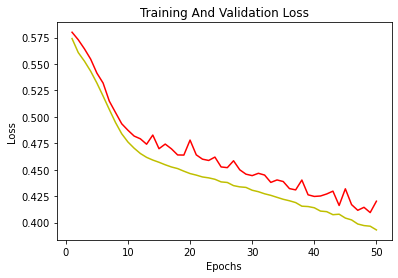

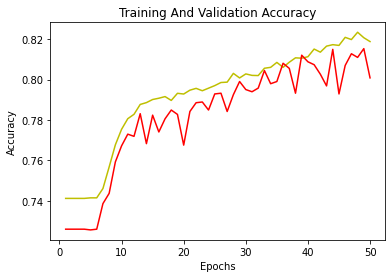

In [38]:
loss = ConvNeuNet.history['loss']
val_loss = ConvNeuNet.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

acc = ConvNeuNet.history['accuracy']
val_acc = ConvNeuNet.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Training Accuracy')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [39]:
ConvNeuNet.history

{'loss': [0.5741102695465088,
  0.560850203037262,
  0.5526764988899231,
  0.5431883931159973,
  0.5320066213607788,
  0.5196816921234131,
  0.5069752931594849,
  0.49461305141448975,
  0.483965665102005,
  0.4761900305747986,
  0.47031456232070923,
  0.465314120054245,
  0.4616674482822418,
  0.45910587906837463,
  0.45700666308403015,
  0.45464032888412476,
  0.4525633752346039,
  0.45103710889816284,
  0.4485803544521332,
  0.4463195502758026,
  0.44485771656036377,
  0.44311341643333435,
  0.44225072860717773,
  0.4409162998199463,
  0.43843191862106323,
  0.43788644671440125,
  0.43490251898765564,
  0.4337323009967804,
  0.4332166910171509,
  0.4305419325828552,
  0.42915305495262146,
  0.42717495560646057,
  0.4256996512413025,
  0.4238155782222748,
  0.4219696819782257,
  0.4205697476863861,
  0.41885602474212646,
  0.4154450297355652,
  0.41510865092277527,
  0.4139508903026581,
  0.4107964038848877,
  0.4102645814418793,
  0.4073905646800995,
  0.407854825258255,
  0.40419554

In [40]:
model.evaluate(X_test,y_test)

87/87 [==============================] - 1s 12ms/step - loss: 0.4202 - accuracy: 0.8009


[0.4201507568359375, 0.8008689284324646]

In [41]:
y_pred = model.predict(X_test).reshape(-1,)
y_pred

87/87 [==============================] - 3s 12ms/step


array([0.56940246, 0.9792206 , 0.959364  , ..., 0.9834989 , 0.2743907 ,
       0.9425587 ], dtype=float32)

In [42]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [43]:
y_test = y_test.reshape(-1,)
y_test

array([1, 1, 1, ..., 1, 0, 1])

In [44]:
def plot_sample(X , y, index):
    plt.figure(figsize = (5,5))
    plt.imshow(X[index])
    plt.xlabel(Categories[y[index]])
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


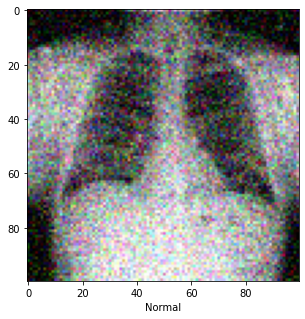

In [45]:
plot_sample(X_test, y_test, 650)

In [46]:
img = X_test[900]
inp_img = np.expand_dims(img, axis=0)
print(model.predict(inp_img))
print(y_test[900])

1/1 [==============================] - 0s 16ms/step
[[0.64215153]]
1


In [47]:
y_pred

array([0.56940246, 0.9792206 , 0.959364  , ..., 0.9834989 , 0.2743907 ,
       0.9425587 ], dtype=float32)

In [48]:
y_predclasses = [np.max(element) for element in y_pred]
for i in range(0,len(y_predclasses)):
    if y_predclasses[i] < 0.5:
       y_predclasses[i] = 0
    else:
       y_predclasses[i] = 1
y_predclasses

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [49]:
Categories[y_predclasses[2508]]

'Normal'

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Classification Report:\n",classification_report(y_test,y_predclasses))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_predclasses))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.34      0.49       757
           1       0.80      0.97      0.88      2005

    accuracy                           0.80      2762
   macro avg       0.81      0.66      0.68      2762
weighted avg       0.81      0.80      0.77      2762

Confusion Matrix:
 [[ 260  497]
 [  53 1952]]


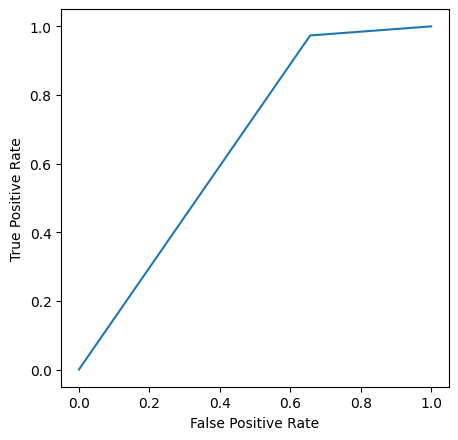

In [51]:
from sklearn.metrics import roc_curve,auc
FPR,TPR,threshold=roc_curve(y_test,y_predclasses)
auc = auc(FPR,TPR)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(FPR,TPR,linestyle='-',label='SVM(auc=%0.3f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [52]:
#K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5)

In [53]:
scores = []
for train_index, test_index in kf.split(X,y):
    X_train , y_train , X_test, y_test = X[train_index] , y[train_index] , X[test_index], y[test_index]
    X_train = X_train.reshape(len(X_train), 100, 100, 3)
    y_train = y_train.reshape(len(y_train), 1)
    X_test = X_test.reshape(len(X_test), 100, 100, 3)
    y_test = y_test.reshape(len(y_test), 1)
    model.fit(X_train, y_train, batch_size = 60, epochs = 10)
    scores.append(model.evaluate(X_test,y_test))
scores

Epoch 1/10
185/185 [==============================] - 21s 113ms/step - loss: 0.4061 - accuracy: 0.8146
Epoch 2/10
185/185 [==============================] - 19s 103ms/step - loss: 0.4033 - accuracy: 0.8142
Epoch 3/10
185/185 [==============================] - 22s 118ms/step - loss: 0.4029 - accuracy: 0.8177
Epoch 4/10
185/185 [==============================] - 21s 113ms/step - loss: 0.4009 - accuracy: 0.8205
Epoch 5/10
185/185 [==============================] - 22s 116ms/step - loss: 0.3996 - accuracy: 0.8198
Epoch 6/10
185/185 [==============================] - 21s 112ms/step - loss: 0.3981 - accuracy: 0.8205
Epoch 7/10
185/185 [==============================] - 23s 124ms/step - loss: 0.3952 - accuracy: 0.8220
Epoch 8/10
185/185 [==============================] - 22s 118ms/step - loss: 0.3963 - accuracy: 0.8227
Epoch 9/10
185/185 [==============================] - 21s 112ms/step - loss: 0.3924 - accuracy: 0.8245
Epoch 10/10
87/87 [==============================] - 1s 12ms/step - loss:

[[0.44895100593566895, 0.7693700194358826],
 [0.3281051218509674, 0.8656770586967468],
 [0.4010743498802185, 0.8052136301994324],
 [0.46297934651374817, 0.8018833994865417],
 [0.31677550077438354, 0.8591090440750122]]